## Overview

Machine learning is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? We will use Python to perform supervised learning, an essential component of machine learning. We will build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. We be using scikit-learn, one of the most popular and user-friendly machine learning libraries for Python.

# Libraries

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

# Classification


Introduction to classification problems and how to solve them using supervised learning techniques. We'll explore a political dataset, where we will classify the party affiliation of United States congressmen based on their voting records.

## Supervised learning


> ### What is machine learning?
- The art and science of:
  - Giving computers the ability to learn to make decisions from data 
  - without being explicitly programmed!
- Examples:
  - Learning to predict whether an email is spam or not
  - Clustering wikipedia entries into different categories
- Supervised learning: Uses labeled data
- Unsupervised learning: Uses unlabeled data


> ### Unsupervised learning
- Uncovering hidden patterns from unlabeled data
- Example:
  - Grouping customers into distinct categories (Clustering)


> ### Reinforcement learning
- Software agents interact with an environment
  - Learn how to optimize their behavior
  - Given a system of rewards and punishments
  - Draws inspiration from behavioral psychology
- Applications
  - Economics
  - Genetics
  - Game playing
- AlphaGo: First computer to defeat the world champion in Go


> ### Supervised learning
- Predictor variables/features and a target variable
- Aim: 
  - Predict the target variable, given the predictor variables
    - Classication: Target variable consists of categories
    - Regression: Target variable is continuous


> ### Naming conventions
- Features = predictor variables = independent variables
- Target variable = dependent variable = response variable


> ### Supervised learning
- Automate time-consuming or expensive manual tasks
  - Example: Doctor’s diagnosis
- Make predictions about the future
  - Example: Will a customer click on an ad or not?
- Need labeled data
  - Historical data with labels
  - Experiments to get labeled data
  - Crowd-sourcing labeled data


> ### Supervised learning in Python
- We will use scikit-learn/sklearn
  - Integrates well with the SciPy stack 
- Otherlibraries
  - Tensor Flow
  - keras


## Exploratory data analysis


> ### The Iris dataset
- Features:
  - Petal length 
  - Petal width
  - Sepal length
  - Sepal width
- Target variable:
  - Species Versicolor
  - Virginica
  - Setosa


### The Iris dataset in scikit-learn

In [6]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
type(iris.data)

numpy.ndarray

In [9]:
type(iris.target)

numpy.ndarray

In [10]:
iris.data.shape

(150, 4)

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Exploratory data analysis (EDA)

In [12]:
X = iris.data
y= iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visual EDA

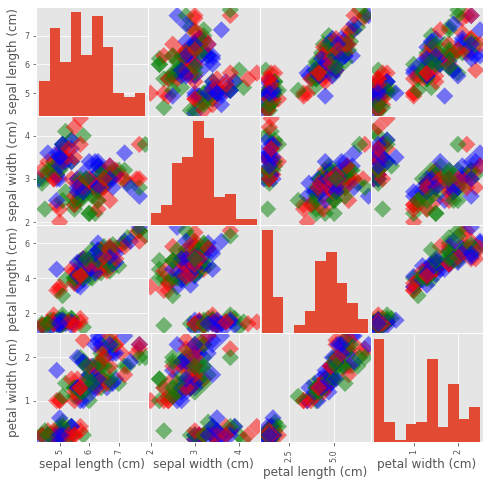

In [16]:
_ = pd.plotting.scatter_matrix(df, c=['red', 'blue', 'green']*50, figsize=[8,8], s=150, marker="D")

### Numerical EDA

We'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.


> Note: Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that our focus can be directed towards understanding how to train and evaluate supervised learning models.


Before thinking about what supervised learning models we can apply to this, however, we need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.